In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import auc,roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:/Users/Chaitra.b.c/Desktop/Imarticus/Machine Learning/ML Excel/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

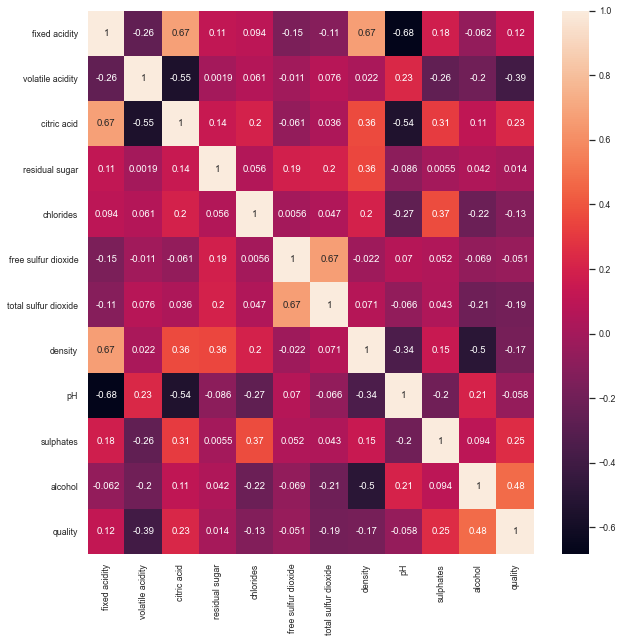

In [5]:
sns.set(rc = {'figure.figsize':(10,10)}, font_scale = 0.8)
cmap = sns.color_palette('rocket',as_cmap = True)
sns.heatmap(df.corr(), cmap = cmap, annot = True)

## General visualization of the whole dataset

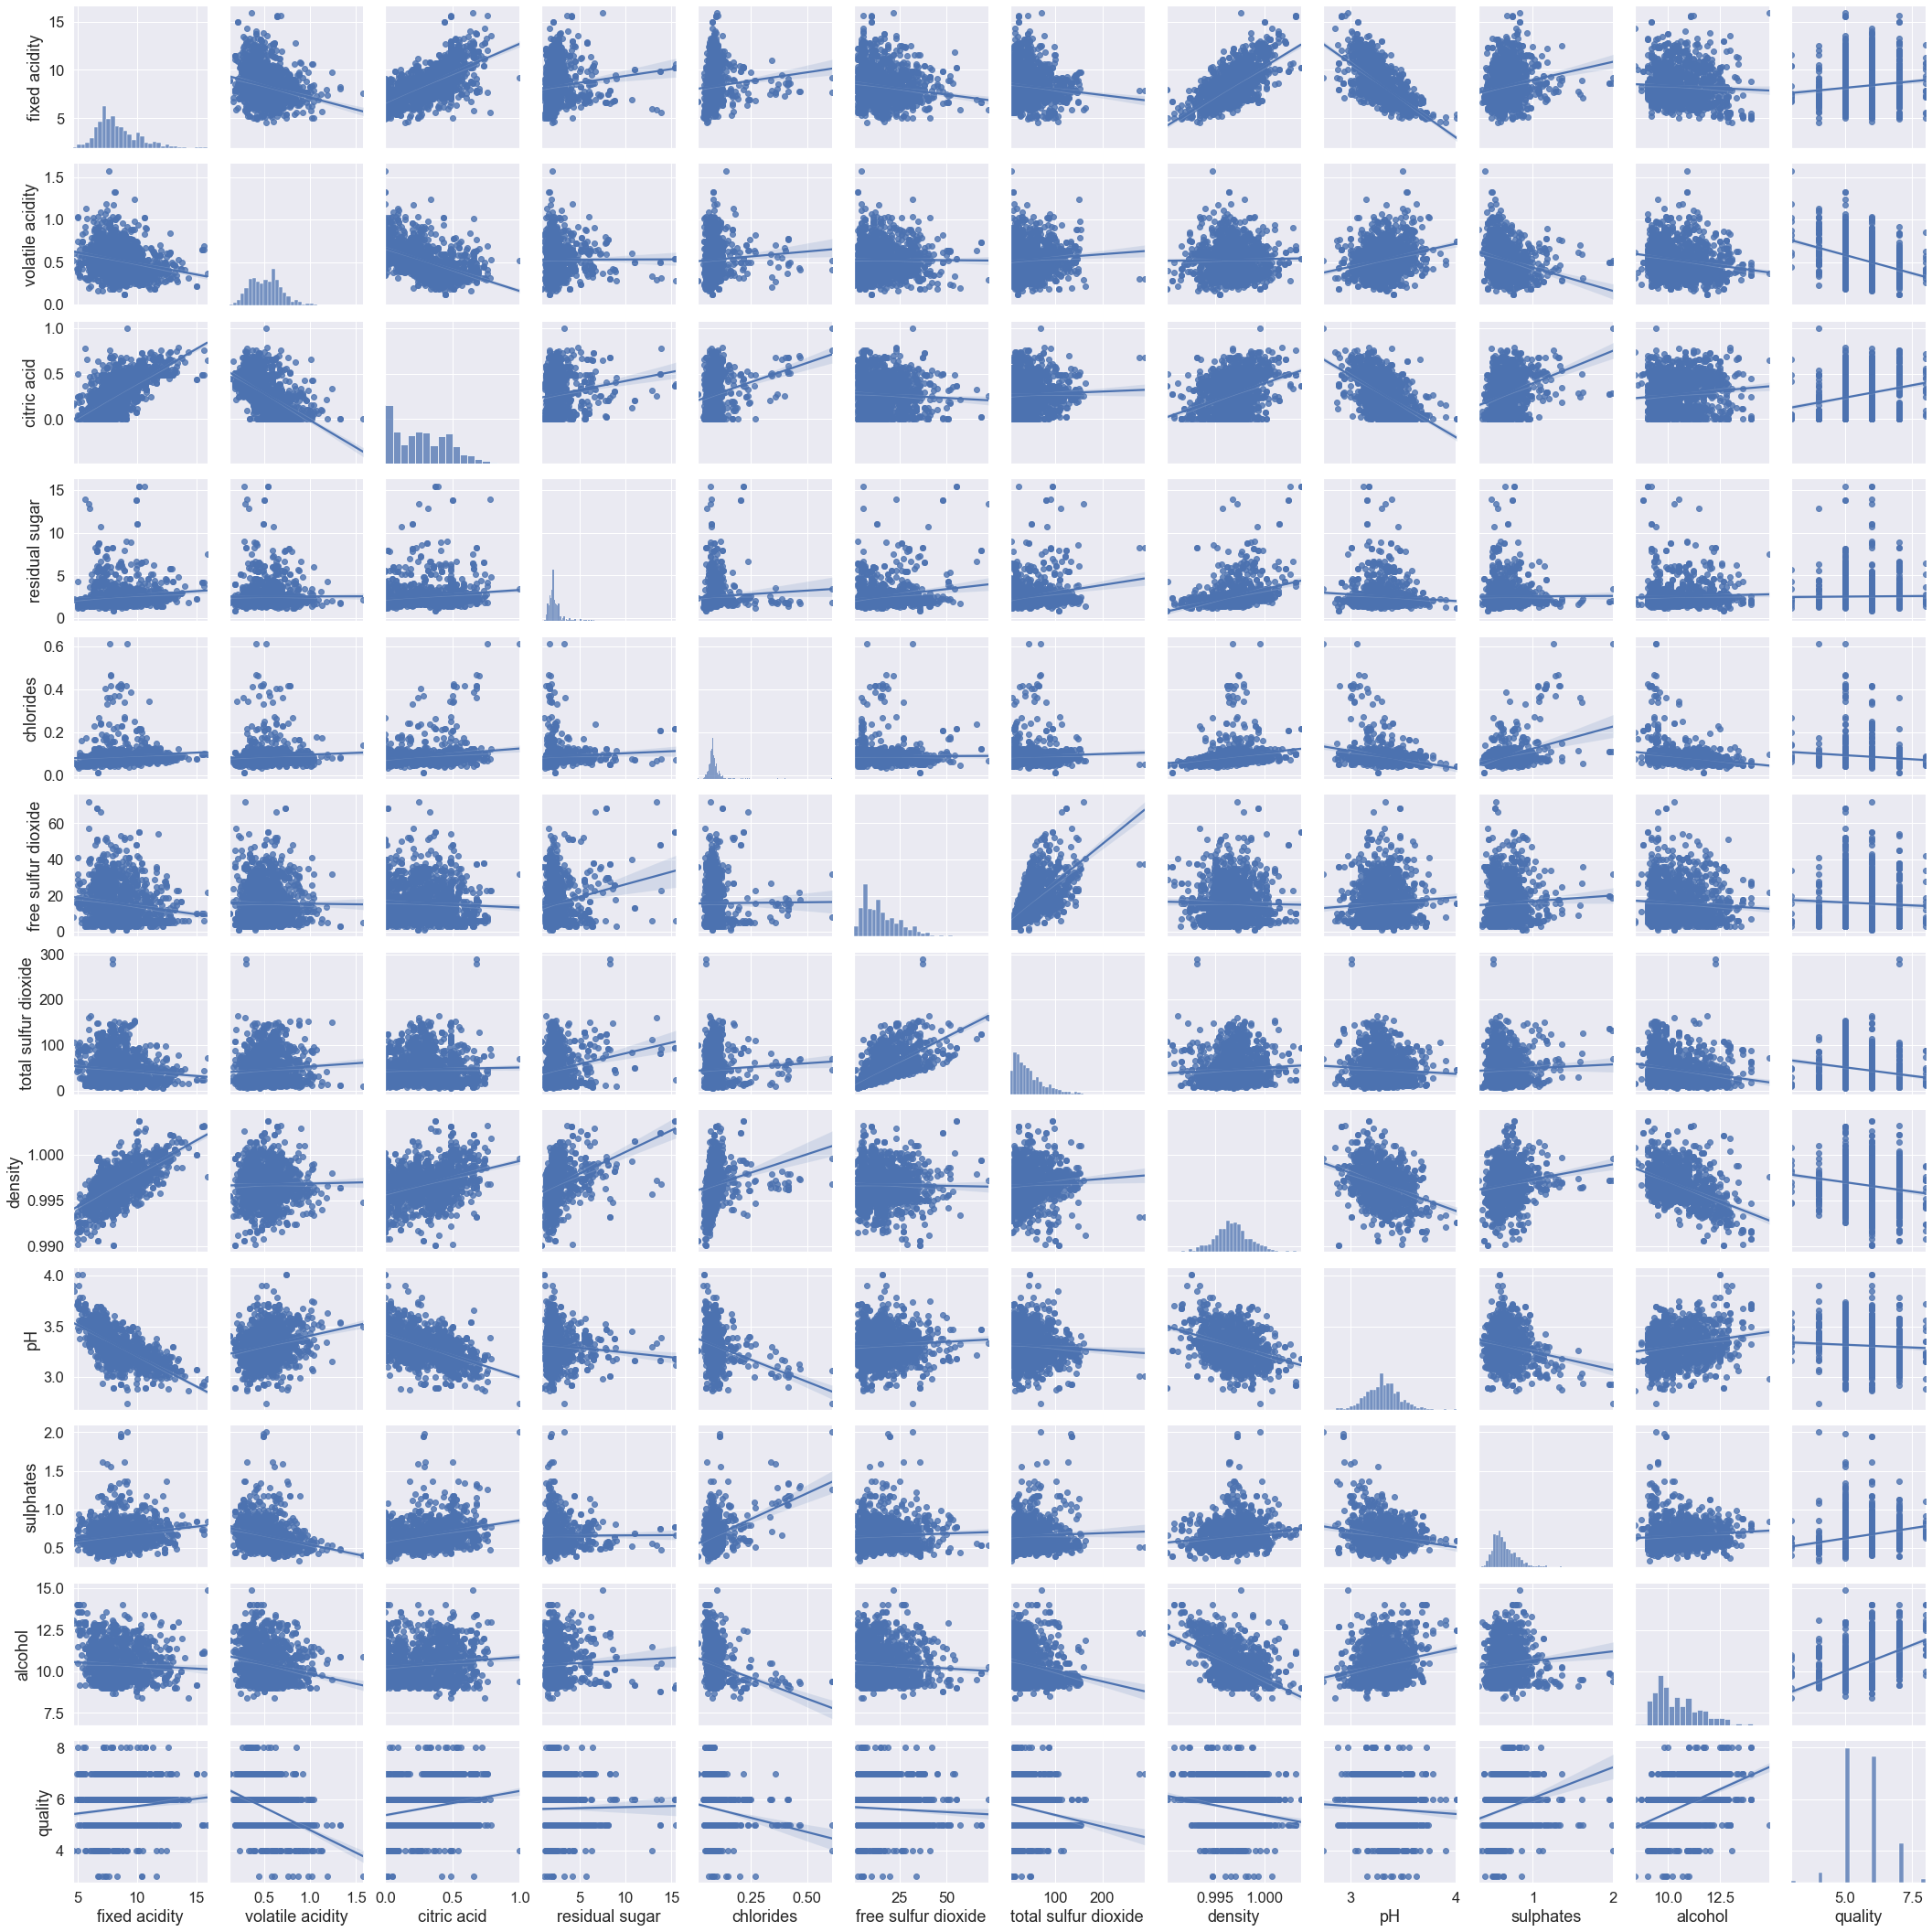

In [6]:
sns.set(rc = {'figure.figsize':(10,10)}, font_scale = 1.5)
sns.pairplot(df,kind = 'reg')

### Few columns are correlated to each other with more than 0.5 value.
___ Visualizing these columns  

The columns which are correlated:

fixed acidity and citric acid
fixed acidity and density
free sulfur dioxide and total sulfur dioxide


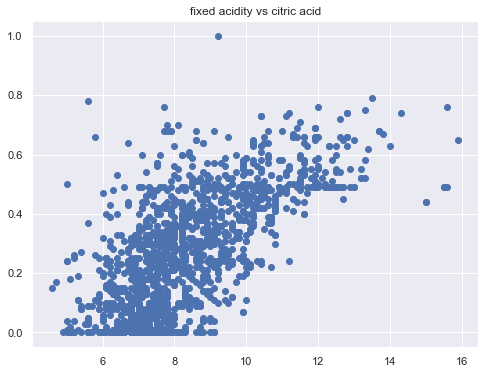

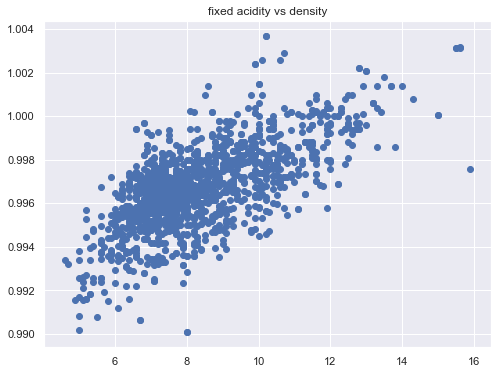

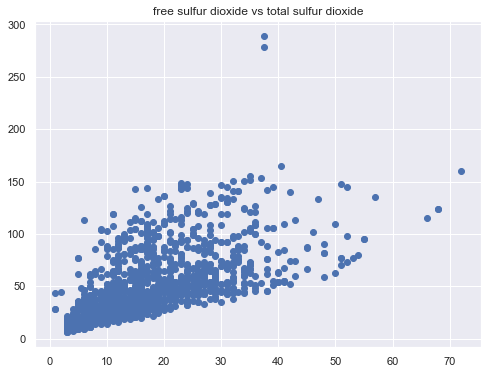

In [7]:
ii = []
cc = []
l = []
# 
print("The columns which are correlated:\n")
for index in df.corr().index:
    for columns in df.corr().columns:
        if set([index,columns]) not in l:
            if index != columns:
                if df.corr()[index][columns] > 0.5:
                    print(index,"and",columns)
                    ii.append(index)
                    cc.append(columns)
                    l.append(set([index,columns]))
                if df.corr()[index][columns] < 0.5:
                    continue
                if index == "NUM_Target" and columns == "NUM_Target":
                    break

            
# Scatter plot to show the relation.
sns.set(rc = {"figure.figsize":(8,6)},font_scale = 1)
for a,b in zip(ii,cc):
    if a!=b:
        plt.scatter(x = df[a],y = df[b])
        plt.title(f"{a} vs {b}")
        plt.show()

## Target variable

In [8]:
df['quality'].value_counts()

## considering a regressive model

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## fixed acidity

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64
Inter Quartile range:  2.0999999999999996
Upper_outliers:  49
lower_outliers:  0


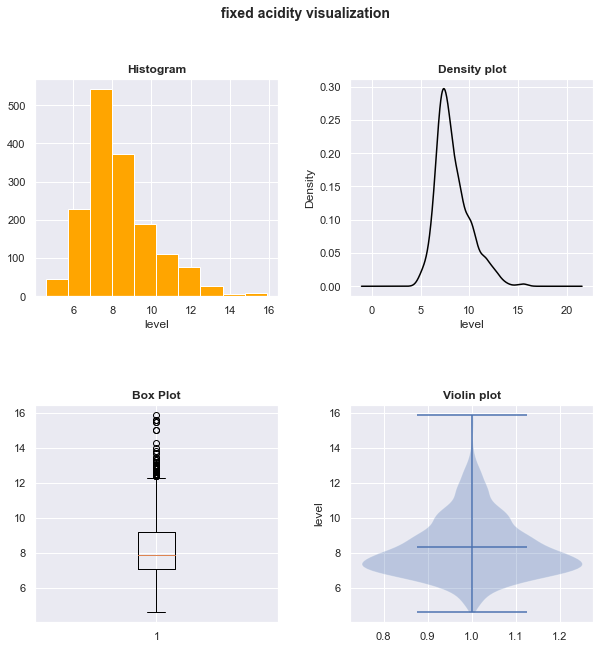

In [9]:
i = 'fixed acidity'
if i == 'fixed acidity':
    sns.set(rc = {'figure.figsize':(10,10)})
    fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    fig.suptitle(f"{i} visualization", fontsize = 14, fontweight = 'bold')

    ax1.hist(df[i],color = 'orange')
    ax1.set_title("Histogram",fontweight = 'bold')
    ax1.set_xlabel("level")

    df[i].plot.density(ax = ax2,color = 'black')
    ax2.set_title("Density plot",fontweight = 'bold')
    ax2.set_xlabel("level")

    ax3.boxplot(df[i])
    ax3.set_title('Box Plot',fontweight = 'bold')
    
    ax4.violinplot(df[i],showmeans = True)
    ax4.set_title('Violin plot',fontweight = 'bold')
    ax4.set_ylabel("level")
    
    print(df[i].describe())
    
    IQR = df[i].describe()[6] - df[i].describe()[4]
    print("Inter Quartile range: ",IQR)
    
    upper_outliers = df[i][df[i] > df[i].describe()[6]+1.5*IQR].count()
    print("Upper_outliers: ",upper_outliers)

    lower_outliers = df[i][df[i] < df[i].describe()[4]-1.5*IQR].count()
    print("lower_outliers: ",lower_outliers)

## volatile acidity

count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64
Inter Quartile range:  0.25
Upper_outliers:  19
lower_outliers:  0


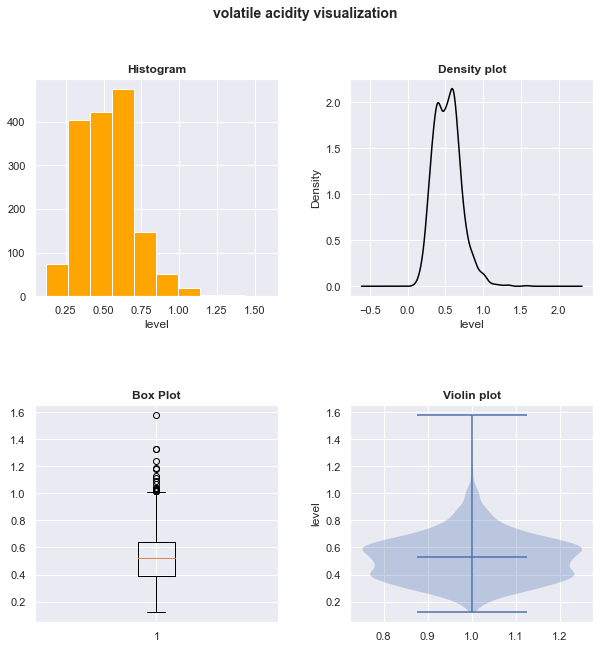

In [10]:
i = 'volatile acidity'
if i == 'volatile acidity':
    sns.set(rc = {'figure.figsize':(10,10)})
    fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    fig.suptitle(f"{i} visualization", fontsize = 14, fontweight = 'bold')

    ax1.hist(df[i],color = 'orange')
    ax1.set_title("Histogram",fontweight = 'bold')
    ax1.set_xlabel("level")

    df[i].plot.density(ax = ax2,color = 'black')
    ax2.set_title("Density plot",fontweight = 'bold')
    ax2.set_xlabel("level")

    ax3.boxplot(df[i])
    ax3.set_title('Box Plot',fontweight = 'bold')
    
    ax4.violinplot(df[i],showmeans = True)
    ax4.set_title('Violin plot',fontweight = 'bold')
    ax4.set_ylabel("level")
    
    print(df[i].describe())
    
    IQR = df[i].describe()[6] - df[i].describe()[4]
    print("Inter Quartile range: ",IQR)
    
    upper_outliers = df[i][df[i] > df[i].describe()[6]+1.5*IQR].count()
    print("Upper_outliers: ",upper_outliers)

    lower_outliers = df[i][df[i] < df[i].describe()[4]-1.5*IQR].count()
    print("lower_outliers: ",lower_outliers)

## citric acid

count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64
Inter Quartile range:  0.32999999999999996
Upper_outliers:  1
lower_outliers:  0


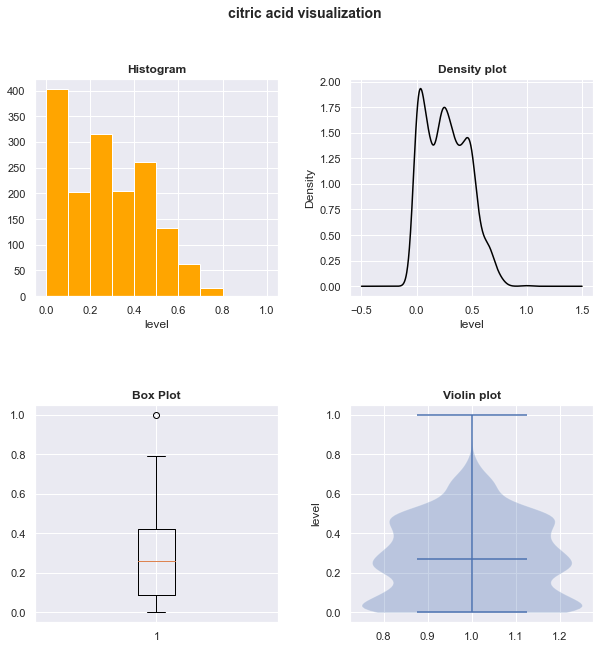

In [11]:
i = 'citric acid'
if i == 'citric acid':
    sns.set(rc = {'figure.figsize':(10,10)})
    fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    fig.suptitle(f"{i} visualization", fontsize = 14, fontweight = 'bold')

    ax1.hist(df[i],color = 'orange')
    ax1.set_title("Histogram",fontweight = 'bold')
    ax1.set_xlabel("level")

    df[i].plot.density(ax = ax2,color = 'black')
    ax2.set_title("Density plot",fontweight = 'bold')
    ax2.set_xlabel("level")

    ax3.boxplot(df[i])
    ax3.set_title('Box Plot',fontweight = 'bold')
    
    ax4.violinplot(df[i],showmeans = True)
    ax4.set_title('Violin plot',fontweight = 'bold')
    ax4.set_ylabel("level")
    
    print(df[i].describe())
    
    IQR = df[i].describe()[6] - df[i].describe()[4]
    print("Inter Quartile range: ",IQR)
    
    upper_outliers = df[i][df[i] > df[i].describe()[6]+1.5*IQR].count()
    print("Upper_outliers: ",upper_outliers)

    lower_outliers = df[i][df[i] < df[i].describe()[4]-1.5*IQR].count()
    print("lower_outliers: ",lower_outliers)

## residual sugar

count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64
Inter Quartile range:  0.7000000000000002
Upper_outliers:  155
lower_outliers:  0


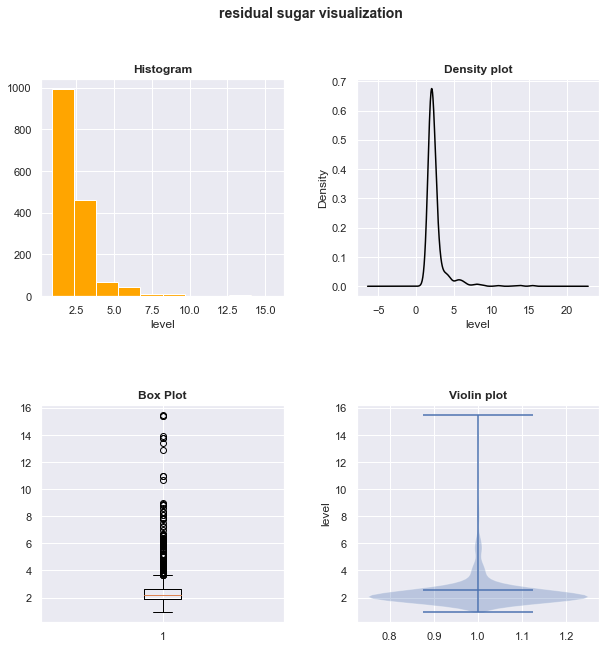

In [12]:
i = 'residual sugar'
if i == 'residual sugar':
    sns.set(rc = {'figure.figsize':(10,10)})
    fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    fig.suptitle(f"{i} visualization", fontsize = 14, fontweight = 'bold')

    ax1.hist(df[i],color = 'orange')
    ax1.set_title("Histogram",fontweight = 'bold')
    ax1.set_xlabel("level")

    df[i].plot.density(ax = ax2,color = 'black')
    ax2.set_title("Density plot",fontweight = 'bold')
    ax2.set_xlabel("level")

    ax3.boxplot(df[i])
    ax3.set_title('Box Plot',fontweight = 'bold')
    
    ax4.violinplot(df[i],showmeans = True)
    ax4.set_title('Violin plot',fontweight = 'bold')
    ax4.set_ylabel("level")
    
    print(df[i].describe())
    
    IQR = df[i].describe()[6] - df[i].describe()[4]
    print("Inter Quartile range: ",IQR)
    
    upper_outliers = df[i][df[i] > df[i].describe()[6]+1.5*IQR].count()
    print("Upper_outliers: ",upper_outliers)

    lower_outliers = df[i][df[i] < df[i].describe()[4]-1.5*IQR].count()
    print("lower_outliers: ",lower_outliers)

## chlorides

count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64
Inter Quartile range:  0.01999999999999999
Upper_outliers:  103
lower_outliers:  9


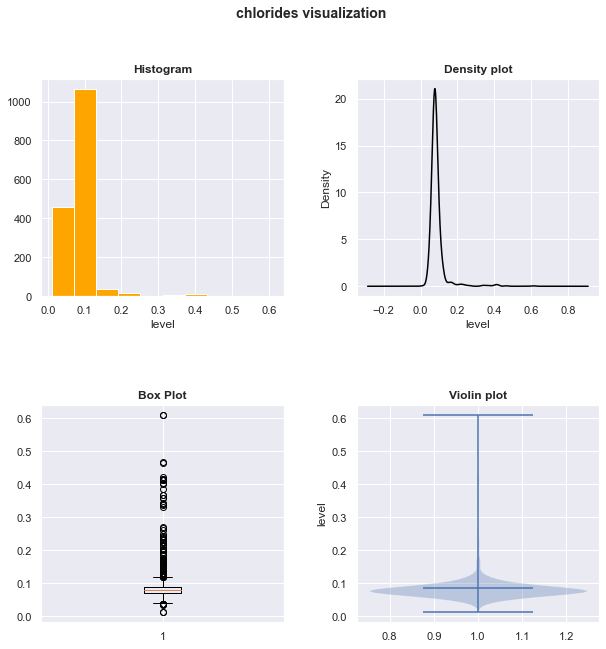

In [13]:
i = 'chlorides'
if i == 'chlorides':
    sns.set(rc = {'figure.figsize':(10,10)})
    fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    fig.suptitle(f"{i} visualization", fontsize = 14, fontweight = 'bold')

    ax1.hist(df[i],color = 'orange')
    ax1.set_title("Histogram",fontweight = 'bold')
    ax1.set_xlabel("level")

    df[i].plot.density(ax = ax2,color = 'black')
    ax2.set_title("Density plot",fontweight = 'bold')
    ax2.set_xlabel("level")

    ax3.boxplot(df[i])
    ax3.set_title('Box Plot',fontweight = 'bold')
    
    ax4.violinplot(df[i],showmeans = True)
    ax4.set_title('Violin plot',fontweight = 'bold')
    ax4.set_ylabel("level")
    
    print(df[i].describe())
    
    IQR = df[i].describe()[6] - df[i].describe()[4]
    print("Inter Quartile range: ",IQR)
    
    upper_outliers = df[i][df[i] > df[i].describe()[6]+1.5*IQR].count()
    print("Upper_outliers: ",upper_outliers)

    lower_outliers = df[i][df[i] < df[i].describe()[4]-1.5*IQR].count()
    print("lower_outliers: ",lower_outliers)

## free sulfur dioxide

count    1599.000000
mean       15.874922
std        10.460157
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64
Inter Quartile range:  14.0
Upper_outliers:  30
lower_outliers:  0


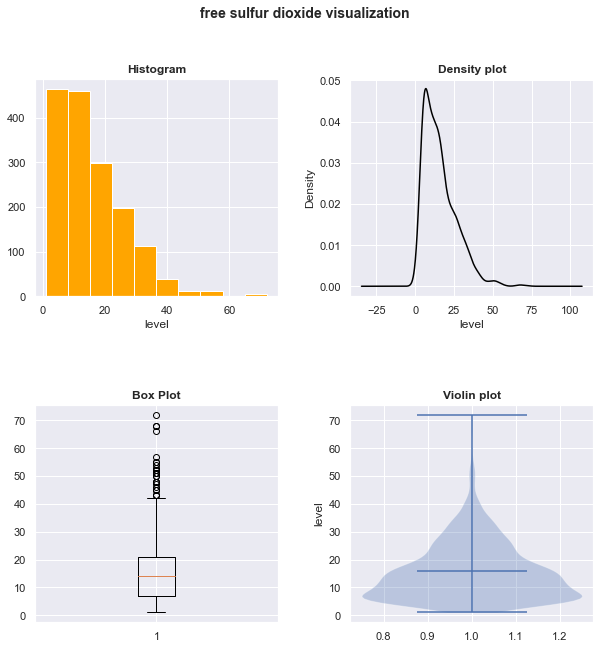

In [14]:
i = 'free sulfur dioxide'
if i == 'free sulfur dioxide':
    sns.set(rc = {'figure.figsize':(10,10)})
    fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    fig.suptitle(f"{i} visualization", fontsize = 14, fontweight = 'bold')

    ax1.hist(df[i],color = 'orange')
    ax1.set_title("Histogram",fontweight = 'bold')
    ax1.set_xlabel("level")

    df[i].plot.density(ax = ax2,color = 'black')
    ax2.set_title("Density plot",fontweight = 'bold')
    ax2.set_xlabel("level")

    ax3.boxplot(df[i])
    ax3.set_title('Box Plot',fontweight = 'bold')
    
    ax4.violinplot(df[i],showmeans = True)
    ax4.set_title('Violin plot',fontweight = 'bold')
    ax4.set_ylabel("level")
    
    print(df[i].describe())
    
    IQR = df[i].describe()[6] - df[i].describe()[4]
    print("Inter Quartile range: ",IQR)
    
    upper_outliers = df[i][df[i] > df[i].describe()[6]+1.5*IQR].count()
    print("Upper_outliers: ",upper_outliers)

    lower_outliers = df[i][df[i] < df[i].describe()[4]-1.5*IQR].count()
    print("lower_outliers: ",lower_outliers)

## total sulfur dioxide

count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64
Inter Quartile range:  40.0
Upper_outliers:  55
lower_outliers:  0


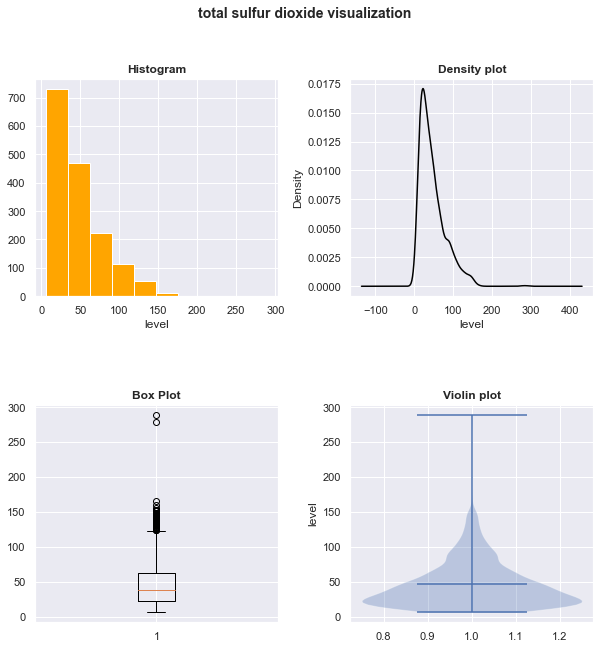

In [15]:
i = 'total sulfur dioxide'
if i == 'total sulfur dioxide':
    sns.set(rc = {'figure.figsize':(10,10)})
    fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    fig.suptitle(f"{i} visualization", fontsize = 14, fontweight = 'bold')

    ax1.hist(df[i],color = 'orange')
    ax1.set_title("Histogram",fontweight = 'bold')
    ax1.set_xlabel("level")

    df[i].plot.density(ax = ax2,color = 'black')
    ax2.set_title("Density plot",fontweight = 'bold')
    ax2.set_xlabel("level")

    ax3.boxplot(df[i])
    ax3.set_title('Box Plot',fontweight = 'bold')
    
    ax4.violinplot(df[i],showmeans = True)
    ax4.set_title('Violin plot',fontweight = 'bold')
    ax4.set_ylabel("level")
    
    print(df[i].describe())
    
    IQR = df[i].describe()[6] - df[i].describe()[4]
    print("Inter Quartile range: ",IQR)
    
    upper_outliers = df[i][df[i] > df[i].describe()[6]+1.5*IQR].count()
    print("Upper_outliers: ",upper_outliers)

    lower_outliers = df[i][df[i] < df[i].describe()[4]-1.5*IQR].count()
    print("lower_outliers: ",lower_outliers)

## density

count    1599.000000
mean        0.996747
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997835
max         1.003690
Name: density, dtype: float64
Inter Quartile range:  0.002234999999999987
Upper_outliers:  24
lower_outliers:  21


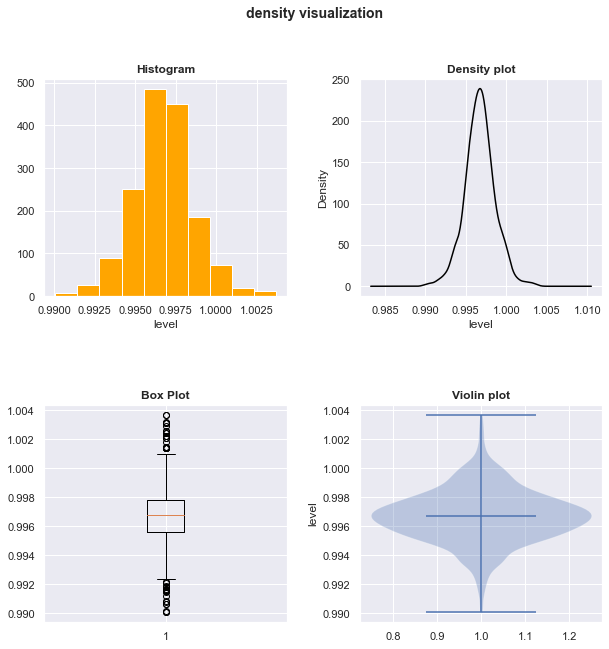

In [16]:
i = 'density'
if i == 'density':
    sns.set(rc = {'figure.figsize':(10,10)})
    fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    fig.suptitle(f"{i} visualization", fontsize = 14, fontweight = 'bold')

    ax1.hist(df[i],color = 'orange')
    ax1.set_title("Histogram",fontweight = 'bold')
    ax1.set_xlabel("level")

    df[i].plot.density(ax = ax2,color = 'black')
    ax2.set_title("Density plot",fontweight = 'bold')
    ax2.set_xlabel("level")

    ax3.boxplot(df[i])
    ax3.set_title('Box Plot',fontweight = 'bold')
    
    ax4.violinplot(df[i],showmeans = True)
    ax4.set_title('Violin plot',fontweight = 'bold')
    ax4.set_ylabel("level")
    
    print(df[i].describe())
    
    IQR = df[i].describe()[6] - df[i].describe()[4]
    print("Inter Quartile range: ",IQR)
    
    upper_outliers = df[i][df[i] > df[i].describe()[6]+1.5*IQR].count()
    print("Upper_outliers: ",upper_outliers)

    lower_outliers = df[i][df[i] < df[i].describe()[4]-1.5*IQR].count()
    print("lower_outliers: ",lower_outliers)

## pH

count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64
Inter Quartile range:  0.18999999999999995
Upper_outliers:  21
lower_outliers:  14


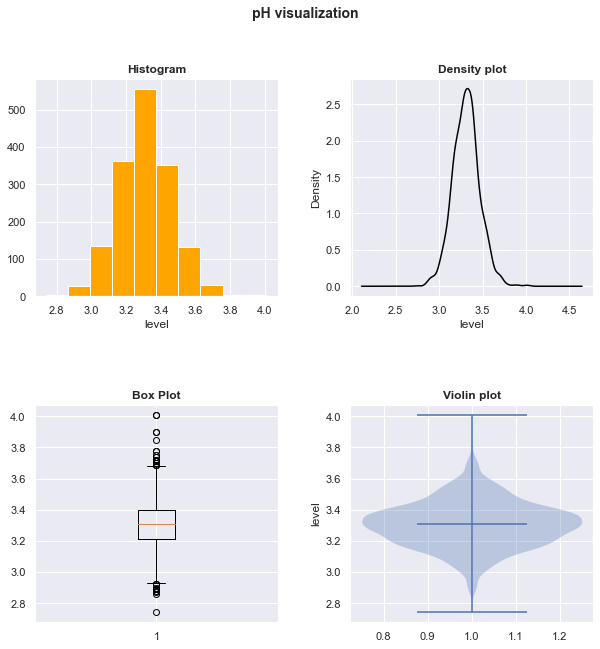

In [17]:
i = 'pH'
if i == 'pH':
    sns.set(rc = {'figure.figsize':(10,10)})
    fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    fig.suptitle(f"{i} visualization", fontsize = 14, fontweight = 'bold')

    ax1.hist(df[i],color = 'orange')
    ax1.set_title("Histogram",fontweight = 'bold')
    ax1.set_xlabel("level")

    df[i].plot.density(ax = ax2,color = 'black')
    ax2.set_title("Density plot",fontweight = 'bold')
    ax2.set_xlabel("level")

    ax3.boxplot(df[i])
    ax3.set_title('Box Plot',fontweight = 'bold')
    
    ax4.violinplot(df[i],showmeans = True)
    ax4.set_title('Violin plot',fontweight = 'bold')
    ax4.set_ylabel("level")
    
    print(df[i].describe())
    
    IQR = df[i].describe()[6] - df[i].describe()[4]
    print("Inter Quartile range: ",IQR)
    
    upper_outliers = df[i][df[i] > df[i].describe()[6]+1.5*IQR].count()
    print("Upper_outliers: ",upper_outliers)

    lower_outliers = df[i][df[i] < df[i].describe()[4]-1.5*IQR].count()
    print("lower_outliers: ",lower_outliers)

## sulphates

count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64
Inter Quartile range:  0.17999999999999994
Upper_outliers:  59
lower_outliers:  0


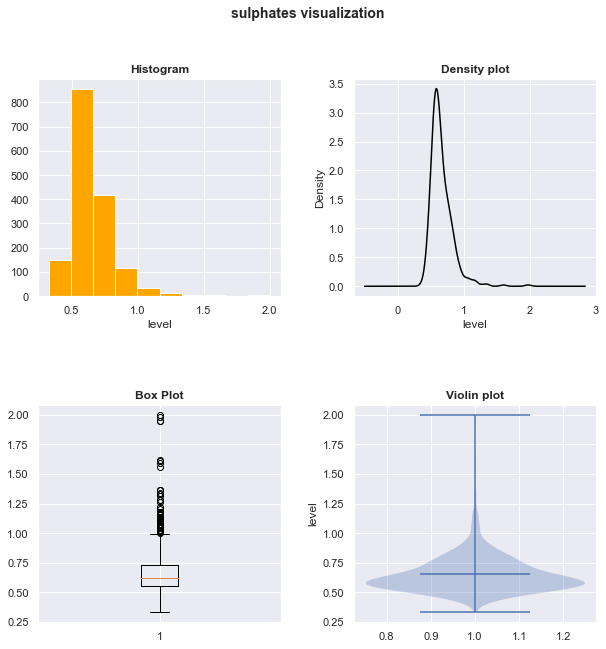

In [18]:
i = 'sulphates'
if i == 'sulphates':
    sns.set(rc = {'figure.figsize':(10,10)})
    fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    fig.suptitle(f"{i} visualization", fontsize = 14, fontweight = 'bold')

    ax1.hist(df[i],color = 'orange')
    ax1.set_title("Histogram",fontweight = 'bold')
    ax1.set_xlabel("level")

    df[i].plot.density(ax = ax2,color = 'black')
    ax2.set_title("Density plot",fontweight = 'bold')
    ax2.set_xlabel("level")

    ax3.boxplot(df[i])
    ax3.set_title('Box Plot',fontweight = 'bold')
    
    ax4.violinplot(df[i],showmeans = True)
    ax4.set_title('Violin plot',fontweight = 'bold')
    ax4.set_ylabel("level")
    
    print(df[i].describe())
    
    IQR = df[i].describe()[6] - df[i].describe()[4]
    print("Inter Quartile range: ",IQR)
    
    upper_outliers = df[i][df[i] > df[i].describe()[6]+1.5*IQR].count()
    print("Upper_outliers: ",upper_outliers)

    lower_outliers = df[i][df[i] < df[i].describe()[4]-1.5*IQR].count()
    print("lower_outliers: ",lower_outliers)

## alcohol

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64
Inter Quartile range:  1.5999999999999996
Upper_outliers:  13
lower_outliers:  0


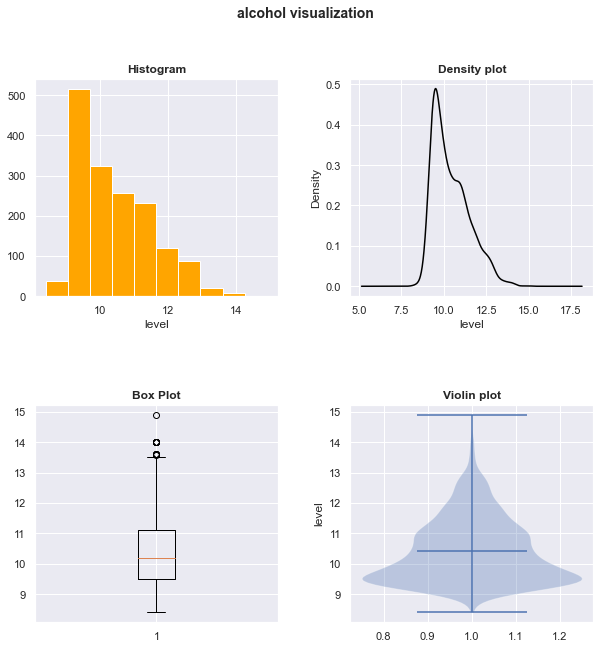

In [19]:
i = 'alcohol'
if i == 'alcohol':
    sns.set(rc = {'figure.figsize':(10,10)})
    fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    fig.suptitle(f"{i} visualization", fontsize = 14, fontweight = 'bold')

    ax1.hist(df[i],color = 'orange')
    ax1.set_title("Histogram",fontweight = 'bold')
    ax1.set_xlabel("level")

    df[i].plot.density(ax = ax2,color = 'black')
    ax2.set_title("Density plot",fontweight = 'bold')
    ax2.set_xlabel("level")

    ax3.boxplot(df[i])
    ax3.set_title('Box Plot',fontweight = 'bold')
    
    ax4.violinplot(df[i],showmeans = True)
    ax4.set_title('Violin plot',fontweight = 'bold')
    ax4.set_ylabel("level")
    
    print(df[i].describe())
    
    IQR = df[i].describe()[6] - df[i].describe()[4]
    print("Inter Quartile range: ",IQR)
    
    upper_outliers = df[i][df[i] > df[i].describe()[6]+1.5*IQR].count()
    print("Upper_outliers: ",upper_outliers)

    lower_outliers = df[i][df[i] < df[i].describe()[4]-1.5*IQR].count()
    print("lower_outliers: ",lower_outliers)

## Feature selection

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [21]:
X = df.iloc[:,0:10]
y = df.iloc[:,11]

print(X.shape)
y.shape

(1599, 10)


(1599,)

In [22]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Feature Selection

In [51]:
#_______________Base model
rfr = RandomForestRegressor(random_state = 42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)


In [52]:
residuals = y_test - y_pred
mse = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mse)

print("MSE: ", mse)
print("RMSE:", RMSE)

MSE:  0.3509366666666667
RMSE: 0.5923990771993713


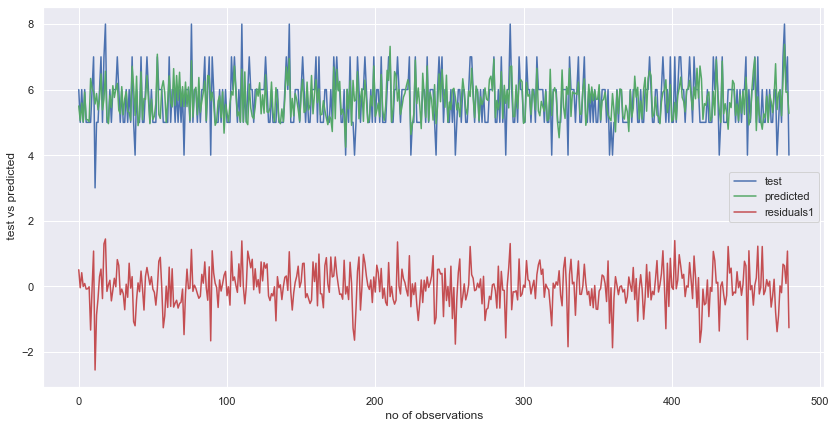

In [54]:
obsno = np.arange(len(y_test))
resd_1 = y_test - y_pred

plt.figure(figsize = (14,7))
plt.plot(obsno, y_test, "b")
plt.plot(obsno, y_pred, "g")
plt.plot(obsno, residuals, "r")
plt.xlabel(" no of observations ")
plt.ylabel(" test vs predicted")
plt.legend( labels = ("test","predicted","residuals1"), loc = "best")
plt.show()

In [55]:
fi = pd.DataFrame({"feature": list(X_train.columns),
                   "importance": rfr.feature_importances_}).sort_values("importance", ascending = False)
fi

,feature,importance
9,sulphates,0.207662
7,density,0.156361
1,volatile acidity,0.140257
6,total sulfur dioxide,0.108536
4,chlorides,0.079840
3,residual sugar,0.078359
2,citric acid,0.065529
0,fixed acidity,0.058370
8,pH,0.056481
5,free sulfur dioxide,0.048606


## With Feature importance predictors

In [77]:
Xn_train = X_train.iloc[:,[9,7,1,6,4,3,2]]
Xn_test = X_test.iloc[:,[9,7,1,6,4,3,2]]
print(Xn_train.shape)

(1119, 7)


In [78]:
rfr = RandomForestRegressor(random_state = 42)
rfr.fit(Xn_train, y_train)
y_pred = rfr.predict(Xn_test)

In [79]:
residuals = y_test - y_pred
mse = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mse)

print("MSE: ", mse)
print("RMSE:", RMSE)

MSE:  0.3645720833333333
RMSE: 0.6037980484676423


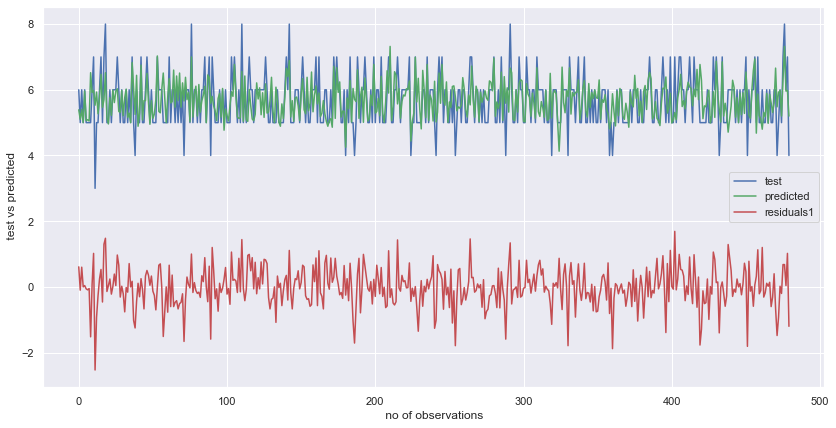

In [80]:
obsno = np.arange(len(y_test))
resd_1 = y_test - y_pred

plt.figure(figsize = (14,7))
plt.plot(obsno, y_test, "b")
plt.plot(obsno, y_pred, "g")
plt.plot(obsno, residuals, "r")
plt.xlabel(" no of observations ")
plt.ylabel(" test vs predicted")
plt.legend( labels = ("test","predicted","residuals1"), loc = "best")
plt.show()

## Hyper parameter Tuning

In [81]:
param_grid = {"bootstrap":[True],"n_estimators":[50,100,150,200,250],"max_depth":[5,6,7,8,9,10,11],
              "max_features":["auto","log2"]}
rfr = RandomForestRegressor(random_state = 1)

G_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

gmod = G_search.fit(Xn_train,y_train)

In [82]:
print(gmod.best_params_)

{'bootstrap': True, 'max_depth': 11, 'max_features': 'log2', 'n_estimators': 250}


In [84]:
gprd = gmod.predict(Xn_test)

In [85]:
mse_G = mean_squared_error(y_test,gprd)
print("MSE : ",mse_G)
print("RMSE : ", np.sqrt(mse_G))

MSE :  0.36500201123486636
RMSE :  0.6041539631872545


### The Base model has a better RMSE Value than the Hyper parameter Tuning from feature importance.
### Using RFECV(Recursive Feature Elmination with Cross Validation) Feature selection method


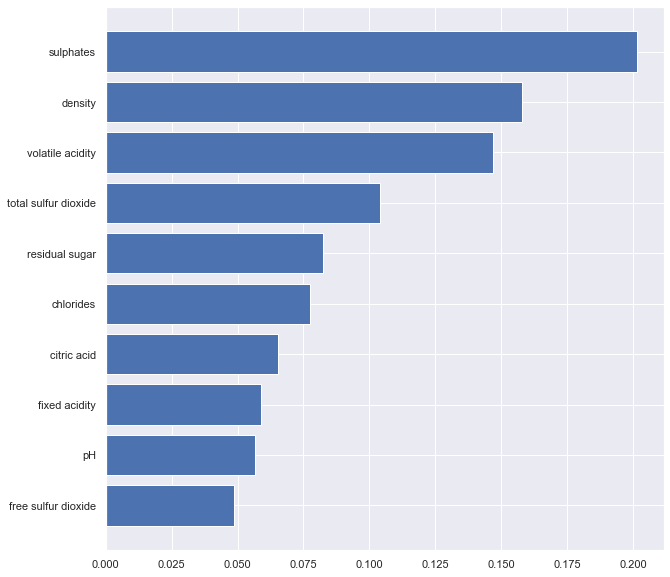

In [87]:
from sklearn.feature_selection import RFECV
features = X_train.columns

rf = RandomForestRegressor(random_state=0)

rf.fit(X_train,y_train)

f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

rfe = RFECV(rf,cv=5,scoring="neg_mean_squared_error")

rfe.fit(X_train,y_train)

selected_features = np.array(features)[rfe.get_support()]

In [88]:
print(selected_features)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates']


## The RFECV has yielded all the columns.

### Therefore going with Base model with Hyper parameter Tuning

In [89]:
#____HYper parameter tuning for the Base Model

param_grid = {"bootstrap":[True],"n_estimators":[50,100,150,200,250,300],"max_depth":[5,6,7,8,9,10,11],
              "max_features":["auto","log2"]}
rfr = RandomForestRegressor(random_state = 1)

G_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

gmod = G_search.fit(X_train,y_train)

In [90]:
print(gmod.best_params_)

{'bootstrap': True, 'max_depth': 11, 'max_features': 'log2', 'n_estimators': 250}


In [91]:
y_pred_gmod = gmod.predict(X_test)

In [92]:
mse_G = mean_squared_error(y_test,y_pred_gmod)
print("MSE : ",mse_G)
print("RMSE : ", np.sqrt(mse_G))

MSE :  0.3548969189454997
RMSE :  0.5957322544109054


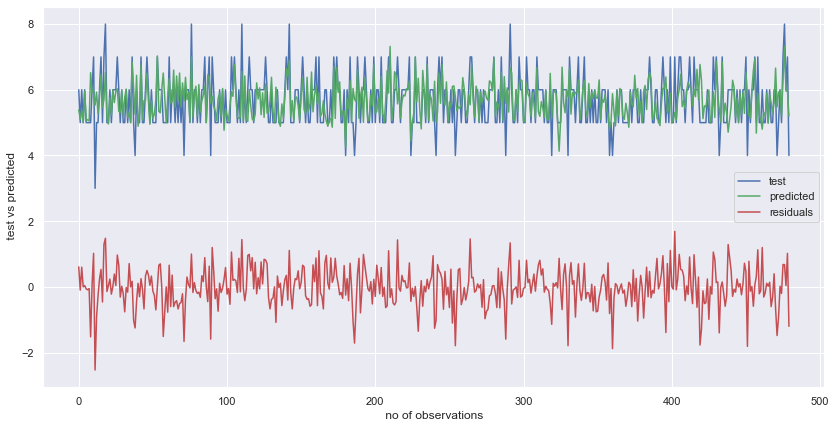

In [93]:
obsno = np.arange(len(y_test))
resd_1 = y_test - y_pred

plt.figure(figsize = (14,7))
plt.plot(obsno, y_test, "b")
plt.plot(obsno, y_pred, "g")
plt.plot(obsno, resd_1, "r")
plt.xlabel(" no of observations ")
plt.ylabel(" test vs predicted")
plt.legend( labels = ("test","predicted","residuals"), loc = "best")
plt.show()

### Adaptive Boosting

In [94]:
from sklearn.ensemble import AdaBoostRegressor

In [95]:
rfr = RandomForestRegressor(random_state = 1,bootstrap = True, max_depth = 11, max_features =  'log2', n_estimators= 250)

In [97]:
ada = AdaBoostRegressor(base_estimator = rfr, n_estimators = 300)

In [98]:
Adafit = ada.fit(X_train,y_train)

In [99]:
y_pred_ada = Adafit.predict(X_test)

In [100]:
residuals_ada = y_test-y_pred_ada
mse_G = mean_squared_error(y_test,y_pred_ada)
print("MSE : ",mse_G)
print("RMSE : ", np.sqrt(mse_G))

MSE :  0.35190546478183315
RMSE :  0.5932162040789455


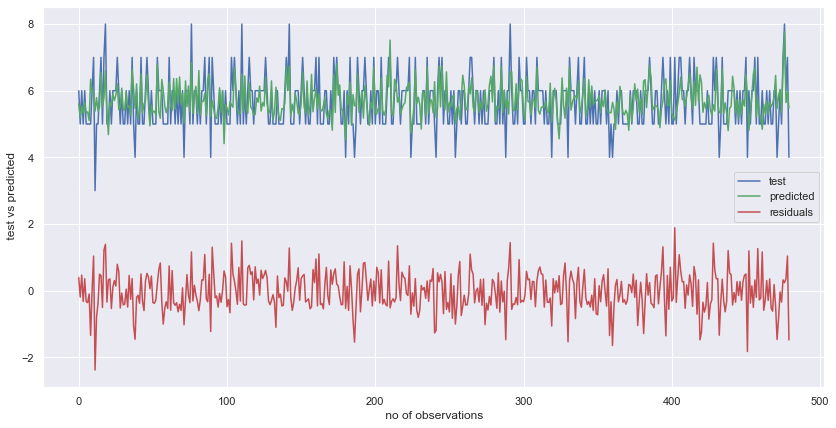

In [101]:
obsno = np.arange(len(y_test))

plt.figure(figsize = (14,7))
plt.plot(obsno, y_test, "b")
plt.plot(obsno, y_pred_ada, "g")
plt.plot(obsno, residuals_ada, "r")
plt.xlabel(" no of observations ")
plt.ylabel(" test vs predicted")
plt.legend( labels = ("test","predicted","residuals"), loc = "best")
plt.show()

residual mean:  -0.03109330602991188


Text(0, 0.5, 'residuals')

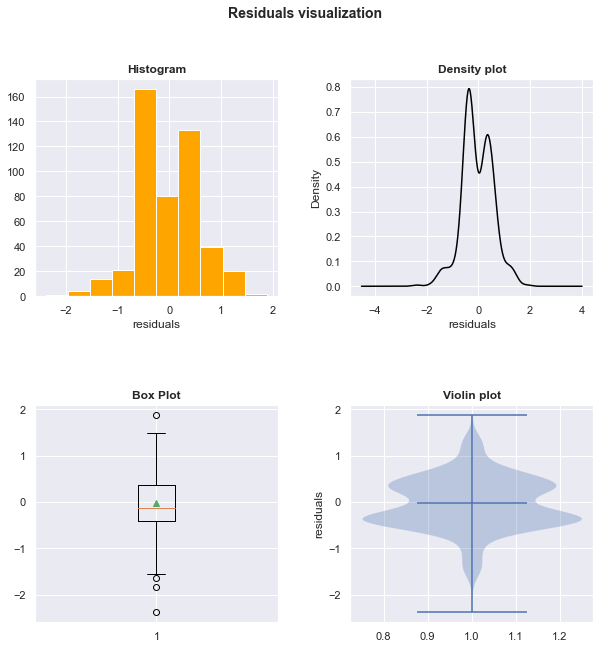

In [115]:
print("residual mean: ",residuals_ada.mean())

sns.set(rc = {'figure.figsize':(10,10)})
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle("Residuals visualization", fontsize = 14, fontweight = 'bold')

ax1.hist(residuals_ada,color = 'orange')
ax1.set_title("Histogram",fontweight = 'bold')
ax1.set_xlabel("residuals")

residuals_ada.plot.density(ax = ax2,color = 'black')
ax2.set_title("Density plot",fontweight = 'bold')
ax2.set_xlabel("residuals")

ax3.boxplot(residuals_ada,showmeans = True)
ax3.set_title('Box Plot',fontweight = 'bold')
    
ax4.violinplot(residuals_ada,showmeans = True)
ax4.set_title('Violin plot',fontweight = 'bold')
ax4.set_ylabel("residuals")

## Bagging 

In [105]:
from sklearn.ensemble import BaggingRegressor

In [106]:
rfr = RandomForestRegressor(random_state = 1,bootstrap = True, max_depth = 11, max_features =  'log2', n_estimators= 250)

In [107]:
BR = BaggingRegressor(base_estimator = rfr, n_estimators = 300)

In [108]:
BRfit = BR.fit(X_train,y_train)

In [109]:
y_pred_BR = BRfit.predict(X_test)

In [110]:
residuals_BR = y_test - y_pred_BR
mse_G = mean_squared_error(y_test,y_pred_BR)
print("MSE : ",mse_G)
print("RMSE : ", np.sqrt(mse_G))

MSE :  0.37131678939744844
RMSE :  0.6093576859262944


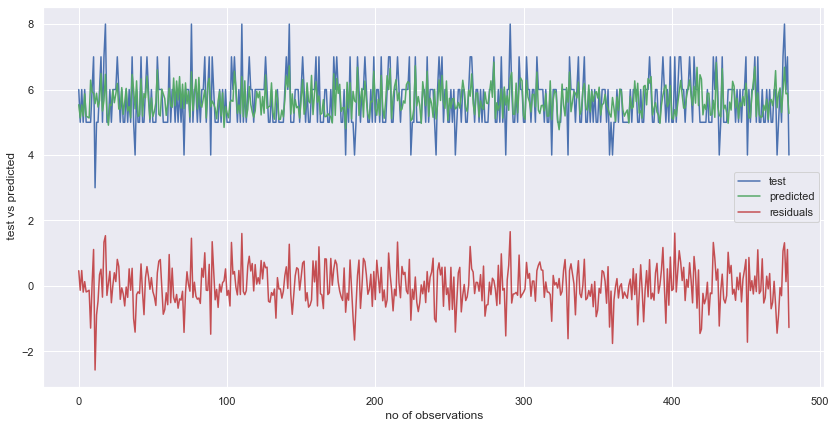

In [111]:
obsno = np.arange(len(y_test))

plt.figure(figsize = (14,7))
plt.plot(obsno, y_test, "b")
plt.plot(obsno, y_pred_BR, "g")
plt.plot(obsno, residuals_BR, "r")
plt.xlabel(" no of observations ")
plt.ylabel(" test vs predicted")
plt.legend( labels = ("test","predicted","residuals"), loc = "best")
plt.show()

### Conclusion: The Base model with all the predictors were chosen to build the model and with adaptive boosting the RMSE value was improved by a tiny amount.